In [16]:
import pandas as pd
import os
path = "sonnet35/accuracy"

In [17]:
# Aggregate accuracy files into a single DataFrame

# List all the accuracy CSV files
accuracy_files = [f for f in os.listdir(path) if f.endswith('_accuracy.csv')]

# Initialize a list to hold individual DataFrames
dfs = []

# Loop through each CSV file and load it into a DataFrame
for accuracy_file in accuracy_files:
    file_path = os.path.join(path, accuracy_file)
    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(file_path)
        
        # Add a column to the DataFrame for the file name (language)
        df['language'] = accuracy_file.replace('_accuracy.csv', '')  # Remove '_accuracy.csv' to get the language name
        
        # Add the DataFrame to the list
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {accuracy_file}: {e}")

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
(combined_df)

,question,choices,answer,subject,llm,prompt,llm_answer,accuracy,language
0,በ 24 = 2p ውስጥ የ p ዋጋ ስንት ነው,"['p = 5', 'p = 9', 'p = 13', 'p = 25']",C,elementary_mathematics,"[TextBlock(text='C)p = 13', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh
1,ወይዘሮ ፔሬዝ በ5 ቀናት ውስጥ በአጠቃላይ 40 ማይል ነድታለች። በየቀኑ ...,"['5', '7', '8', '9']",C,elementary_mathematics,[TextBlock(text='C) 8\n\nTo find the daily mil...,"[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh
2,የ −40 ÷ (−8) ድርሻ ፈልጉ,"['1 ሲካፈል 5', '-5', '−1 ሲካፈል 5', '5']",D,elementary_mathematics,[TextBlock(text='B) -5\n\nThe correct answer i...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,amh
3,የእግር ኳስ ቡድን የእግር ኳስ ኳሶችን ለመግዛት $90.00 አለው። አንድ...,"['4', '5', '6', '7']",B,elementary_mathematics,"[TextBlock(text=""B) 5\n\nTo find the maximum n...","[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh
4,አንተ እና ሶስት ጓደኞች ወደ ኮንሰርት ሄዳችሁ። የአራት ትኬቶች አጠቃላይ...,"['4t = 112; $449', '4t = 112; $29', 't over 4 ...",B,elementary_mathematics,[TextBlock(text='B) 4t = 112; $28\n\nThe equat...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh
...,...,...,...,...,...,...,...,...,...
8995,Ho fokotswa ha meputso e fokolang tlhahisong y...,['sehlahiswa se tlwaelehileng sa mosebetsi se ...,D,high_school_microeconomics,[TextBlock(text='B) Kakaretso ya ho etsa sehla...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot
8996,Seo o se telang ho tswellisa tsela e nngwe e b...,"['tjhelete.', 'lefatshe', 'ditjeho tsa tjhelet...",D,high_school_microeconomics,"[TextBlock(text='B) lefatshe', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot
8997,Ke efe ho tse latelang e senang tshobotsi ya i...,"['Ho kena mahala indastering.', 'Product diffe...",B,high_school_microeconomics,[TextBlock(text='B) Product differentiation\n\...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,sot
8998,E amana le mmaraka wa basebetsi o nang le more...,"['e lefa hanyane mme e hira haholo', 'e lefa h...",D,high_school_microeconomics,[TextBlock(text='B) e lefa hanyane ebe e hira ...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot


In [18]:
# Add fertility files from language_subject pairs to dataframe
grouped_fertility = pd.read_csv('anthropic_language_subject_fertility.csv')
grouped_fertility

,language,subject,mean_fertility
0,amh,elementary_mathematics,4.655221
1,amh,global_facts,5.613975
2,amh,high_school_geography,6.456467
3,amh,high_school_microeconomics,6.504111
4,amh,international_law,6.204830
...,...,...,...
85,zul,elementary_mathematics,3.399386
86,zul,global_facts,3.976540
87,zul,high_school_geography,4.153006
88,zul,high_school_microeconomics,4.076264


In [19]:
combined_df = combined_df.merge(
    grouped_fertility,
    on=['language', 'subject'],
    how='left'
)

# After the merge, the 'mean_fertility' column from grouped_fertility will be in combined_df
# Rename for clarity, if necessary
combined_df.rename(columns={'mean_fertility': 'fertility'}, inplace=True)

# Remove duplicate columns (if running multiple times)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Or Load the updated CSV file into a new DataFrame
#combined_df = pd.read_csv('anthropic_per_subject_results.csv')

## Save the updated DataFrame to a new CSV file
#combined_df.to_csv('anthropic_per_subject_results.csv', index=False)

combined_df

,question,choices,answer,subject,llm,prompt,llm_answer,accuracy,language,fertility
0,በ 24 = 2p ውስጥ የ p ዋጋ ስንት ነው,"['p = 5', 'p = 9', 'p = 13', 'p = 25']",C,elementary_mathematics,"[TextBlock(text='C)p = 13', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh,4.655221
1,ወይዘሮ ፔሬዝ በ5 ቀናት ውስጥ በአጠቃላይ 40 ማይል ነድታለች። በየቀኑ ...,"['5', '7', '8', '9']",C,elementary_mathematics,[TextBlock(text='C) 8\n\nTo find the daily mil...,"[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh,4.655221
2,የ −40 ÷ (−8) ድርሻ ፈልጉ,"['1 ሲካፈል 5', '-5', '−1 ሲካፈል 5', '5']",D,elementary_mathematics,[TextBlock(text='B) -5\n\nThe correct answer i...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,amh,4.655221
3,የእግር ኳስ ቡድን የእግር ኳስ ኳሶችን ለመግዛት $90.00 አለው። አንድ...,"['4', '5', '6', '7']",B,elementary_mathematics,"[TextBlock(text=""B) 5\n\nTo find the maximum n...","[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh,4.655221
4,አንተ እና ሶስት ጓደኞች ወደ ኮንሰርት ሄዳችሁ። የአራት ትኬቶች አጠቃላይ...,"['4t = 112; $449', '4t = 112; $29', 't over 4 ...",B,elementary_mathematics,[TextBlock(text='B) 4t = 112; $28\n\nThe equat...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh,4.655221
...,...,...,...,...,...,...,...,...,...,...
8995,Ho fokotswa ha meputso e fokolang tlhahisong y...,['sehlahiswa se tlwaelehileng sa mosebetsi se ...,D,high_school_microeconomics,[TextBlock(text='B) Kakaretso ya ho etsa sehla...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256
8996,Seo o se telang ho tswellisa tsela e nngwe e b...,"['tjhelete.', 'lefatshe', 'ditjeho tsa tjhelet...",D,high_school_microeconomics,"[TextBlock(text='B) lefatshe', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256
8997,Ke efe ho tse latelang e senang tshobotsi ya i...,"['Ho kena mahala indastering.', 'Product diffe...",B,high_school_microeconomics,[TextBlock(text='B) Product differentiation\n\...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,sot,2.340256
8998,E amana le mmaraka wa basebetsi o nang le more...,"['e lefa hanyane mme e hira haholo', 'e lefa h...",D,high_school_microeconomics,[TextBlock(text='B) e lefa hanyane ebe e hira ...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256


In [20]:
# Aggregate the DataFrame to compute the mean accuracy and fertility per language and subject
aggregated_df = combined_df.groupby(['language', 'subject']).agg(
    mean_accuracy=('accuracy', 'mean'),  # Calculate mean accuracy
    mean_fertility=('fertility', 'mean')  # Calculate mean fertility
).reset_index()

aggregated_df


,language,subject,mean_accuracy,mean_fertility
0,amh,elementary_mathematics,0.61,4.655221
1,amh,global_facts,0.56,5.613975
2,amh,high_school_geography,0.59,6.456467
3,amh,high_school_microeconomics,0.59,6.504111
4,amh,international_law,0.79,6.204830
...,...,...,...,...
85,zul,elementary_mathematics,0.58,3.399386
86,zul,global_facts,0.51,3.976540
87,zul,high_school_geography,0.66,4.153006
88,zul,high_school_microeconomics,0.40,4.076264


In [21]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming aggregated_df is already loaded and contains the necessary columns

# Group by 'subject' (language) and calculate Pearson correlation per group
correlations = {}

for language, group in aggregated_df.groupby('language'):
    corr, p_value = pearsonr(group['mean_accuracy'], group['mean_fertility'])
    correlations[language] = {'correlation': corr, 'p_value': p_value}

# Convert results to a DataFrame for easy viewing
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')

print(correlation_df)


     correlation   p_value
amh     0.164886  0.791016
eng    -0.738232  0.154303
ewe    -0.473924  0.420000
fra    -0.093191  0.881518
hau     0.772175  0.125982
ibo     0.149333  0.810572
kin    -0.155864  0.802354
lin     0.176311  0.776683
lug    -0.498345  0.392828
orm    -0.188761  0.761097
sna    -0.666025  0.219711
sot     0.603747  0.280947
swa    -0.049651  0.936809
twi     0.445299  0.452367
wol     0.553326  0.333298
xho    -0.038222  0.951346
yor    -0.648852  0.236186
zul    -0.150791  0.808736


### Adjusting the Visualization for Correlated Languages

#### Purpose:
The visualization aims to examine the relationship between **accuracy** and **fertility** across different languages and subjects. Initially, we used a scatter plot with regression lines for all languages, but to enhance the clarity and relevance of the insights, we adjusted our approach to focus on languages with a strong correlation between accuracy and fertility.

#### Steps and Adjustments:

1. **Pearson Correlation Calculation**:
   - We calculated the **Pearson correlation coefficient** for each language group to determine the strength and direction of the relationship between **mean accuracy** and **mean fertility**.
   - The correlation and its associated p-value were stored in a dictionary and later converted into a DataFrame (`correlation_df`) for easier viewing.
   - From the MEGA Paper " We report the curves for the cases where the person coefficient |ρ| > 0.7 with a p-value of 0.05. We have combined Indic- XNLI and XNLI for a better coverage of languages."

2. **Filtering Correlated Languages**:
   - We filtered languages to include only those with a Pearson correlation coefficient greater than **0.6** (i.e., a strong positive or negative correlation).
   - The languages with a significant correlation were selected for the adjusted visualization.


<Figure size 1200x800 with 0 Axes>

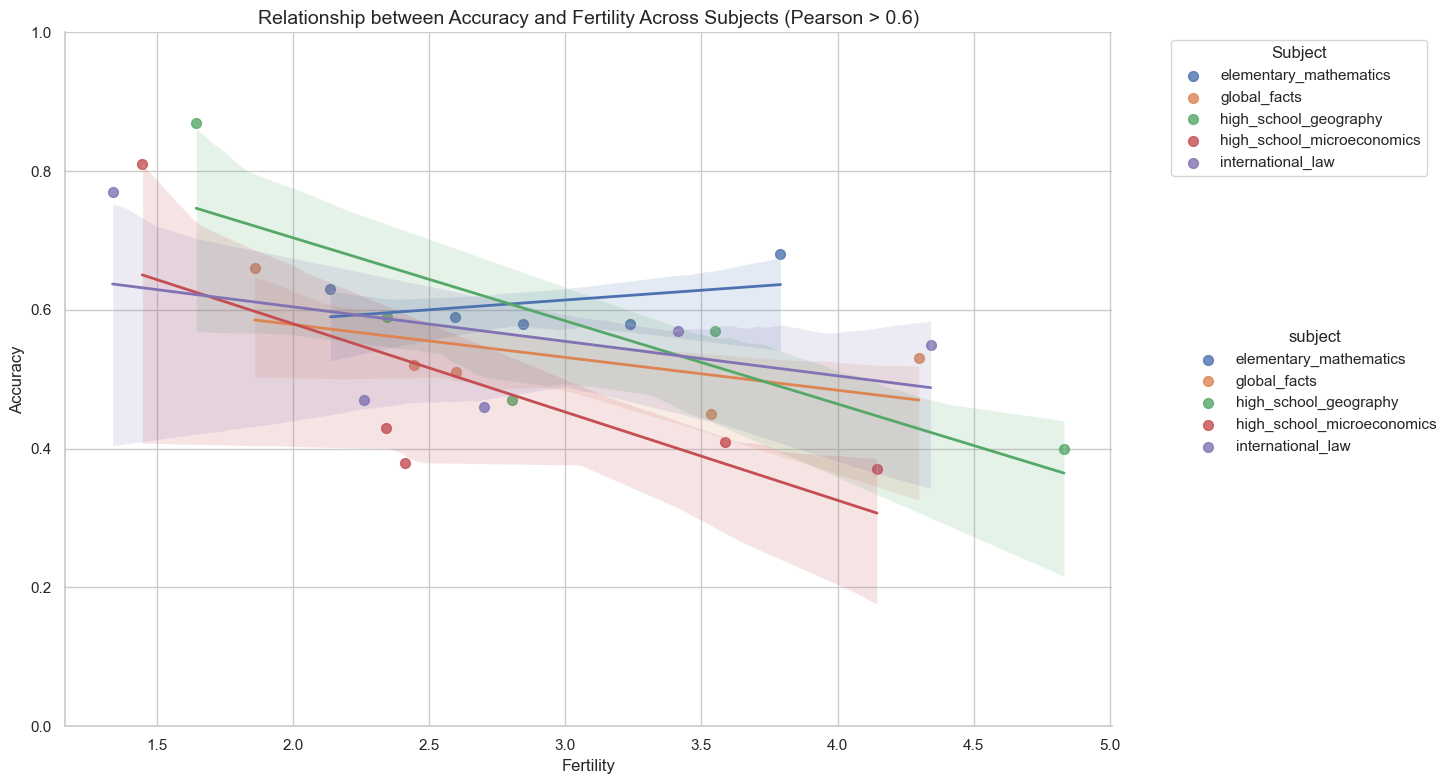

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_df contains the correlations per language
# Filter languages with Pearson correlation > 0.6
valid_languages = correlation_df[abs(correlation_df['correlation']) > 0.6].index

# Filter the original aggregated_df to include only the valid languages
filtered_df = aggregated_df[aggregated_df['language'].isin(valid_languages)]

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create the scatterplot with regression lines for each subject
g = sns.lmplot(
    data=filtered_df,  
    x="mean_fertility",
    y="mean_accuracy",
    hue="subject",
    height=8,
    aspect=1.5,
    scatter_kws={"s": 50},
    line_kws={"linewidth": 2},
    ci=80,
)

plt.title("Relationship between Accuracy and Fertility Across Subjects (Pearson > 0.6)", fontsize=14)
plt.xlabel("Fertility", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0,1)
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()


In [23]:
print(valid_languages)

Index(['eng', 'hau', 'sna', 'sot', 'yor'], dtype='object')


## Parity Section

### Calculating Tokenizer Parity (Premiums)

#### Concept:
To assess how fairly a tokenizer treats equivalent sentences across different languages, we use the concept of **tokenizer parity**. This approach evaluates whether a tokenizer produces similar tokenized lengths for the same sentence in different languages.

#### Definition:
- **Parity** is achieved when the tokenizer generates comparable tokenized lengths for equivalent sentences in different languages.
- For a sentence in language A (`sA`) and its translation in language B (`sB`), a tokenizer `t` achieves parity if the ratio of their tokenized lengths is approximately 1:

Here, `|t(sA)|` represents the tokenized length of the sentence `sA`, and `|t(sB)|` represents the tokenized length of the sentence `sB`.

#### Formula:
- The ratio `|t(sA)| / |t(sB)|` is referred to as the **premium** for language A relative to language B.
- A premium of **1** indicates perfect parity, meaning the tokenizer processes both languages with equal efficiency in terms of tokenized length.

#### Implementation:
- **Objective**: Calculate the premium of each language relative to English for different subjects.
- **Procedure**:
- Iterate over each language and its subjects.
- For each subject, compute the premium as the ratio of the tokenized length in the given language to its length in English.
- Store these premiums in a dictionary.


In [24]:
import pandas as pd

# Remove duplicates in grouped_fertility, just in case
grouped_fertility.drop_duplicates(subset=['language', 'subject', 'mean_fertility'], inplace=True)

# If the code is re-run, remove any existing columns that we will re-create
for col in ['eng_fertility', 'premium']:
    if col in grouped_fertility.columns:
        grouped_fertility.drop(columns=col, inplace=True)

# Extract English fertility as a reference
english_fertility = (
    grouped_fertility
    [grouped_fertility['language'] == 'eng']
    .set_index('subject')['mean_fertility']
    .rename('eng_fertility')
)

# Merge english_fertility into grouped_fertility
grouped_fertility = grouped_fertility.merge(
    english_fertility, 
    on='subject', 
    how='left'
)

# Calculate premium
grouped_fertility['premium'] = (
    grouped_fertility['mean_fertility'] / grouped_fertility['eng_fertility']
)

# Remove duplicates in combined_df (helpful if repeatedly run)
combined_df.drop_duplicates(inplace=True)

# If "parity" already exists in combined_df, drop it
if 'parity' in combined_df.columns:
    combined_df.drop(columns='parity', inplace=True)

# Merge premium into combined_df
combined_df = combined_df.merge(
    grouped_fertility[['language', 'subject', 'premium']], 
    on=['language', 'subject'], 
    how='left'
)

# Rename "premium" to "parity"
combined_df.rename(columns={'premium': 'parity'}, inplace=True)

# Remove any remaining duplicate columns if they exist
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

combined_df


,question,choices,answer,subject,llm,prompt,llm_answer,accuracy,language,fertility,parity
0,በ 24 = 2p ውስጥ የ p ዋጋ ስንት ነው,"['p = 5', 'p = 9', 'p = 13', 'p = 25']",C,elementary_mathematics,"[TextBlock(text='C)p = 13', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh,4.655221,2.178936
1,ወይዘሮ ፔሬዝ በ5 ቀናት ውስጥ በአጠቃላይ 40 ማይል ነድታለች። በየቀኑ ...,"['5', '7', '8', '9']",C,elementary_mathematics,[TextBlock(text='C) 8\n\nTo find the daily mil...,"[{'role': 'user', 'content': [{'type': 'text',...",C,1,amh,4.655221,2.178936
2,የ −40 ÷ (−8) ድርሻ ፈልጉ,"['1 ሲካፈል 5', '-5', '−1 ሲካፈል 5', '5']",D,elementary_mathematics,[TextBlock(text='B) -5\n\nThe correct answer i...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,amh,4.655221,2.178936
3,የእግር ኳስ ቡድን የእግር ኳስ ኳሶችን ለመግዛት $90.00 አለው። አንድ...,"['4', '5', '6', '7']",B,elementary_mathematics,"[TextBlock(text=""B) 5\n\nTo find the maximum n...","[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh,4.655221,2.178936
4,አንተ እና ሶስት ጓደኞች ወደ ኮንሰርት ሄዳችሁ። የአራት ትኬቶች አጠቃላይ...,"['4t = 112; $449', '4t = 112; $29', 't over 4 ...",B,elementary_mathematics,[TextBlock(text='B) 4t = 112; $28\n\nThe equat...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,amh,4.655221,2.178936
...,...,...,...,...,...,...,...,...,...,...,...
8994,Ho fokotswa ha meputso e fokolang tlhahisong y...,['sehlahiswa se tlwaelehileng sa mosebetsi se ...,D,high_school_microeconomics,[TextBlock(text='B) Kakaretso ya ho etsa sehla...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256,1.619530
8995,Seo o se telang ho tswellisa tsela e nngwe e b...,"['tjhelete.', 'lefatshe', 'ditjeho tsa tjhelet...",D,high_school_microeconomics,"[TextBlock(text='B) lefatshe', type='text')]","[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256,1.619530
8996,Ke efe ho tse latelang e senang tshobotsi ya i...,"['Ho kena mahala indastering.', 'Product diffe...",B,high_school_microeconomics,[TextBlock(text='B) Product differentiation\n\...,"[{'role': 'user', 'content': [{'type': 'text',...",B,1,sot,2.340256,1.619530
8997,E amana le mmaraka wa basebetsi o nang le more...,"['e lefa hanyane mme e hira haholo', 'e lefa h...",D,high_school_microeconomics,[TextBlock(text='B) e lefa hanyane ebe e hira ...,"[{'role': 'user', 'content': [{'type': 'text',...",B,0,sot,2.340256,1.619530


In [25]:
aggregated_df_parity = combined_df.groupby(['language','subject']).agg(
    mean_accuracy=('accuracy', 'mean'),
    mean_parity=('parity', 'mean')
).reset_index()

# Display the aggregated DataFrame
(aggregated_df_parity)

,language,subject,mean_accuracy,mean_parity
0,amh,elementary_mathematics,0.61,2.178936
1,amh,global_facts,0.56,3.022304
2,amh,high_school_geography,0.59,3.929891
3,amh,high_school_microeconomics,0.59,4.501047
4,amh,international_law,0.79,4.645591
...,...,...,...,...
85,zul,elementary_mathematics,0.58,1.591127
86,zul,global_facts,0.51,2.140785
87,zul,high_school_geography,0.66,2.527832
88,zul,high_school_microeconomics,0.40,2.820901


In [26]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming aggregated_df is already loaded and contains the necessary columns

# Group by 'subject' (language) and calculate Pearson correlation per group
correlations = {}

for language, group in aggregated_df_parity.groupby('language'):
    corr, p_value = pearsonr(group['mean_accuracy'], group['mean_parity'])
    correlations[language] = {'correlation': corr, 'p_value': p_value}

# Convert results to a DataFrame for easy viewing
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')

print(correlation_df)


     correlation   p_value
amh     0.486809  0.405611
eng          NaN       NaN
ewe    -0.281162  0.646787
fra     0.377476  0.531054
hau    -0.606269  0.278391
ibo    -0.753187  0.141617
kin    -0.084778  0.892186
lin    -0.008126  0.989653
lug    -0.589854  0.295140
orm    -0.482445  0.410471
sna    -0.270274  0.660113
sot    -0.792040  0.110223
swa    -0.342621  0.572454
twi    -0.569425  0.316335
wol    -0.644000  0.240900
xho     0.272119  0.657852
yor    -0.664459  0.221200
zul    -0.335232  0.581305


/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_41235/122986206.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(group['mean_accuracy'], group['mean_parity'])


### Visualization of Parity vs. Accuracy

#### Overview:
This visualization aims to display the relationship between **tokenizer parity** and **accuracy** across different subjects, highlighting how well tokenizers treat equivalent sentences in various languages. The plot helps us understand the connection between how fair a tokenizer is (in terms of parity) and its performance (accuracy) for different subjects.

#### Challenges:
- **Missing Correlations**: Similar to tokenizer efficiency, some subjects may not have strong correlations between **parity** and **accuracy**, leading to missing or unreliable data for certain languages.
- **Cleaner Visualization**: To improve the plot and focus on more reliable data, we filtered for **Pearson correlations greater than 0.4**. This threshold ensures that we only consider languages where the relationship between **parity** and **accuracy** is strong enough to warrant inclusion in the plot.


<Figure size 1200x800 with 0 Axes>

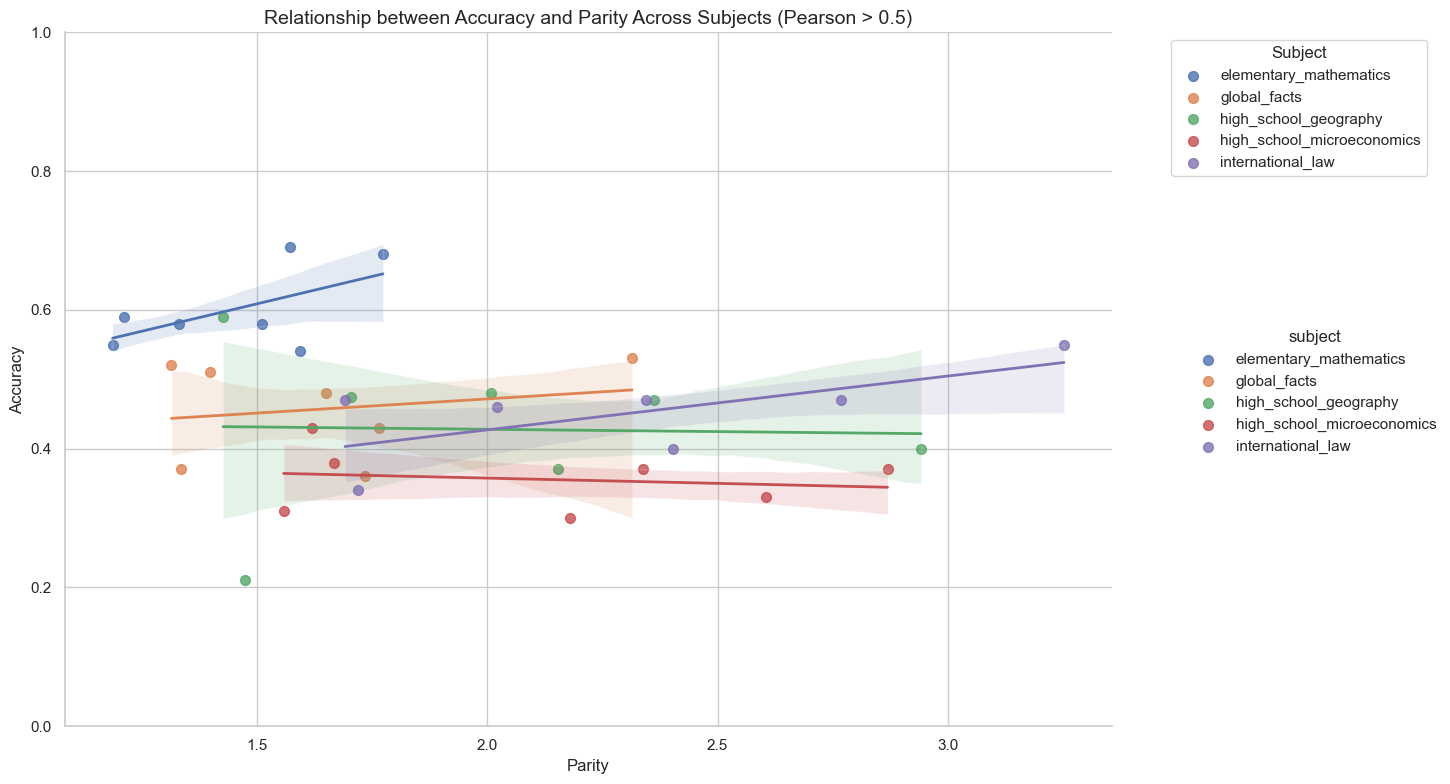

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_df contains the correlations per language
# Filter languages with Pearson correlation > 0.4
valid_languages = correlation_df[abs(correlation_df['correlation']) > 0.5].index

# Filter the original aggregated_df to include only the valid languages
filtered_df = aggregated_df_parity[aggregated_df_parity['language'].isin(valid_languages)]

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create the scatterplot with regression lines for each subject
g = sns.lmplot(
    data=filtered_df,  # Use the filtered dataframe
    x="mean_parity",
    y="mean_accuracy",
    hue="subject",
    height=8,
    aspect=1.5,
    scatter_kws={"s": 50},
    line_kws={"linewidth": 2},
    ci=80,
)

# Customize the plot
plt.title("Relationship between Accuracy and Parity Across Subjects (Pearson > 0.5)", fontsize=14)
plt.xlabel("Parity", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0,1)
# Adjust legend
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()


"This lack of tokenization parity is not merely a curiosity: it leads to unfairness in the cost to access language models, the latency of the service and the amount of data that can be processed." - Language Model Tokenizers Introduce Unfairness Between Languages (Petrov et Bibi.(2023))
This affects costs, latency, and tokenization fairness.